# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


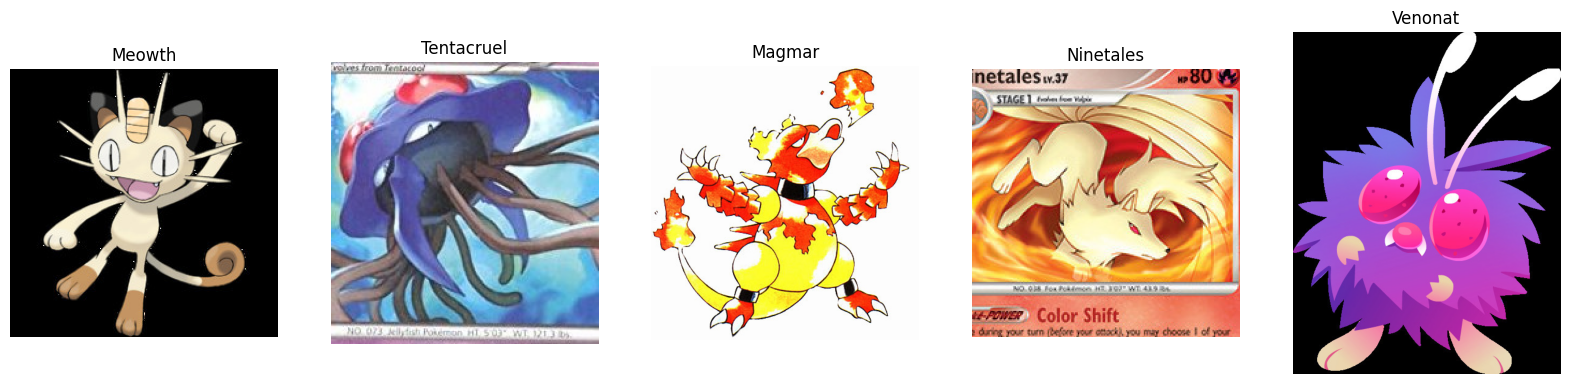

In [16]:
# Start off by randomly picking images from the training set and displaying them with a Unknown label at the bottom
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

training_directory = 'data/training_set'

#plot 5 Pokemon as subplots together, turn off axis, normal colors
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [17]:
# Now we are going to create our CNN model without using libraries

class CNN:
    def __init__(self):
        self.conv_layers = []
        self.pool_layers = []
        self.fc_layers = []
        self.output_layer = None

    def add_conv_layer(self, num_filters, filter_size, activation):
        self.conv_layers.append(ConvLayer(num_filters, filter_size, activation))

    def add_pool_layer(self, pool_size):
        self.pool_layers.append(PoolLayer(pool_size))

    def add_fc_layer(self, num_neurons, activation):
        self.fc_layers.append(FCLayer(num_neurons, activation))

    def add_output_layer(self, num_neurons, activation):
        self.output_layer = FCLayer(num_neurons, activation)

    def forward(self, image):
        for conv_layer in self.conv_layers:
            image = conv_layer.forward(image)
        for pool_layer in self.pool_layers:
            image = pool_layer.forward(image)
        image = image.flatten()
        for fc_layer in self.fc_layers:
            image = fc_layer.forward(image)
        image = self.output_layer.forward(image)
        return image

    def backward(self, image, label):
        error = self.output_layer.backward(image, label)
        for fc_layer in reversed(self.fc_layers):
            error = fc_layer.backward(error)
        error = error.reshape(self.pool_layers[-1].output.shape)
        for pool_layer in reversed(self.pool_layers
                                     ):
                error = pool_layer.backward(error)
        for conv_layer in reversed(self.conv_layers):
            error = conv_layer.backward(error)
        
    def update(self, learning_rate):
        for conv_layer in self.conv_layers:
            conv_layer.update(learning_rate)
        for fc_layer in self.fc_layers:
            fc_layer.update(learning_rate)
        self.output_layer.update(learning_rate)
    
    def train(self, training_data, training_labels, epochs, learning_rate):
        for epoch in range(epochs):
            for image, label in zip(training_data, training_labels):
                self.forward(image)
                self.backward(image, label)
                self.update(learning_rate)
            print("Epoch: " + str(epoch + 1) + " Accuracy: " + str(self.evaluate(training_data, training_labels)))
    
    def evaluate(self, test_data, test_labels):
        correct = 0
        for image, label in zip(test_data, test_labels):
            prediction = self.forward(image)
            if np.argmax(prediction) == np.argmax(label):
                correct += 1
        return correct / len(test_data)
    
    def predict(self, image):
        return self.forward(image)
    
    

In [18]:

# Load the training data
training_data = []
training_labels = []

for pokemon in os.listdir(training_directory):
    for image in os.listdir(training_directory + '/' + pokemon):
        img = mpimg.imread(training_directory + '/' + pokemon + '/' + image)
        training_data.append(img)
        label = np.zeros(150)
        label[int(pokemon)] = 1
        training_labels.append(label)
    
training_data = np.array(training_data)
training_labels = np.array(training_labels)


ValueError: invalid literal for int() with base 10: 'Abra'

In [20]:
# Create the CNN model
model = CNN()
model.add_conv_layer(8, 3, 'relu')
model.add_pool_layer(2)
model.add_conv_layer(16, 3, 'relu')
model.add_pool_layer(2)
model.add_fc_layer(100, 'relu')
model.add_output_layer(150, 'softmax')


NameError: name 'ConvLayer' is not defined

In [19]:

# Train the model
model.train(training_data, training_labels, 10, 0.01)


NameError: name 'model' is not defined